In [ ]:
import pandas as pd
data=pd.read_csv("/content/Titanic Data Set CSV File (main).csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Here age and cabin are related because this dataset was collected after the disaster had happened therefore age and cabin of people who died cannot be collected
#Therefore, age and cabin are not MCAR and they are MNAR
#Whereas the column Embarked column (boarding station) is nowhere related with any other feature therefore it is MCAR

In [ ]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
data[data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
#Converting NaN values in Cabin column into 0 and 1
import numpy as np
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [ ]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#Calculate percentage of NaN values
data['Cabin_null'].mean()

0.7710437710437711

In [ ]:
 data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [ ]:
#A new column Cabin_null has been created that will store 1 for NaN value and 0 for non null

In [ ]:
#Comparing survived and cabin columns

In [ ]:
data.groupby(['Survived'])["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [ ]:
#Above Code Inference: 87% of who didnt survive didnt know the cabin value, 60% of who survived didnt know the cabin value

In [ ]:
data=pd.read_csv('/content/Titanic Data Set CSV File (main).csv',usecols=['Age','Cabin','Fare','Survived'])

In [ ]:
data["Cabin_null"]=np.where(data["Cabin"].isnull(),1,0)
data.head()

,Survived,Age,Fare,Cabin,Cabin_null
0,0,22.0,7.2500,NaN,1
1,1,38.0,71.2833,C85,0
2,1,26.0,7.9250,NaN,1
3,1,35.0,53.1000,C123,0
4,0,35.0,8.0500,NaN,1


In [ ]:
#Checking percentage of missing values
data.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Cabin         0.771044
Cabin_null    0.000000
dtype: float64

In [ ]:
#Creating function to impute NaN values
def impute_nan(data,variable,median):
  data[variable+"_median"]=data[variable].fillna(median)
median=data.Age.median()
median

28.0

In [ ]:
impute_nan(data,'Age',median)

In [ ]:
data.head()

,Survived,Age,Fare,Cabin,Cabin_null,Age_median
0,0,22.0,7.2500,NaN,1,22.0
1,1,38.0,71.2833,C85,0,38.0
2,1,26.0,7.9250,NaN,1,26.0
3,1,35.0,53.1000,C123,0,35.0
4,0,35.0,8.0500,NaN,1,35.0


In [ ]:
#therefore a new column Age_median is created

In [ ]:
median=data.Age.median()
data["Age"].fillna(median)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
#Comparing the standard deviation of prev age and new age_median (imputed column)
print(data["Age"].std())
print(data["Age_median"].std())

14.526497332334042
13.019696550973201


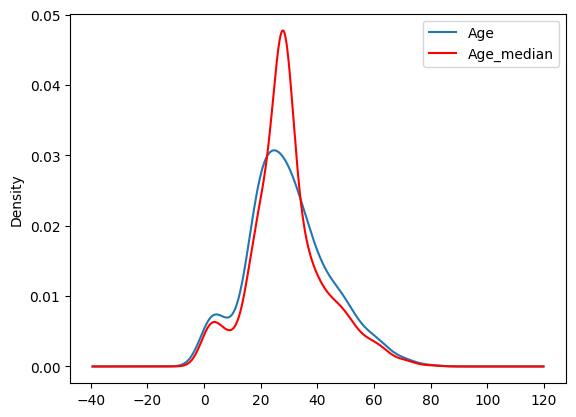

In [ ]:
import matplotlib.pyplot as plt
#Checking distribution of age and age_median
fig=plt.figure()
ax=fig.add_subplot(111)
data["Age"].plot(kind="kde",ax=ax)
data.Age_median.plot(kind="kde",ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
mode=data.Age.mean()
data["Age"].fillna(mode)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
#RANDOM SAMPLE IMPUTATION

In [ ]:
 data=pd.read_csv("/content/Titanic Data Set CSV File (main).csv",usecols=['Age','Fare','Survived'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
#creating a function to replace NaN values with random sample

#creating random value in age
clean=data['Age'].dropna().sample(data["Age"].isnull().sum())
data['Age'].fillna(data['Age'].dropna().sample(data["Age"].isnull().sum()))
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [ ]:
data['Age'].shape

(891,)

In [ ]:
def impute_nan(data,variable,median):
  data[variable+"_median"]=data[variable].fillna(median)
  data[variable+"_random"]=data[variable]
  random_sample=data[variable].dropna().sample(data[variable].isnull().sum())
  #pandas needs to have same index to merge columns
  random_sample.index=data[data[variable].isnull()].index
  data.loc[data[variable].isnull(),variable+'_random']=random_sample
impute_nan(data,'Age',median)

In [ ]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


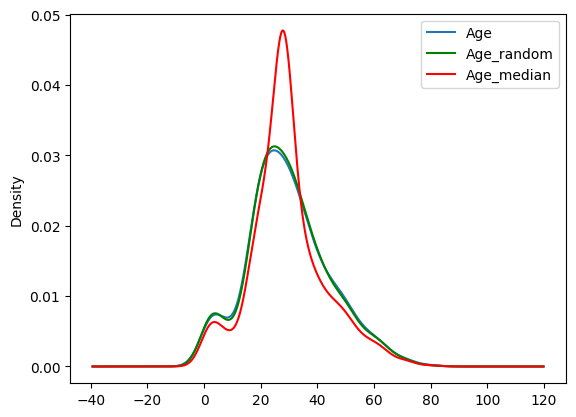

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
data["Age"].plot(kind="kde",ax=ax)
data.Age_random.plot(kind="kde",ax=ax,color='green')
data.Age_median.plot(kind="kde",ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
#in this the distribution looks similar to age that means no variance distortion

In [ ]:
## CAPTURING NAN VALUES WITH NEW FEATURE

In [ ]:
data=pd.read_csv("/content/Titanic Data Set CSV File (main).csv",usecols=['Age','Fare','Survived'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data['Age_NAN']=np.where(data["Age"].isnull(),1,0)

In [ ]:
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
## END OF DISTRIBUTION IMPUTATION
df=pd.read_csv("/content/Titanic Data Set CSV File (main).csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

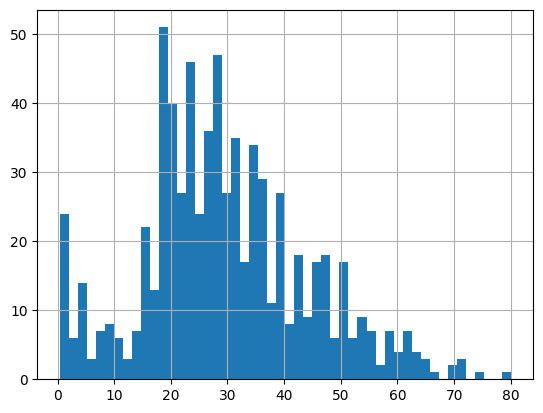

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()

<Axes: >

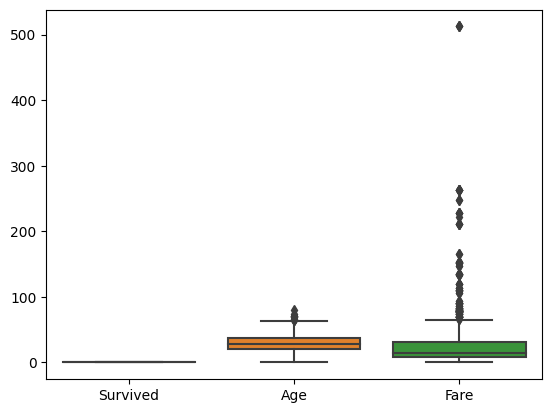

In [ ]:
#we make boxplot to check outliers
import seaborn as sns
sns.boxplot(data=df)

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_dist']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

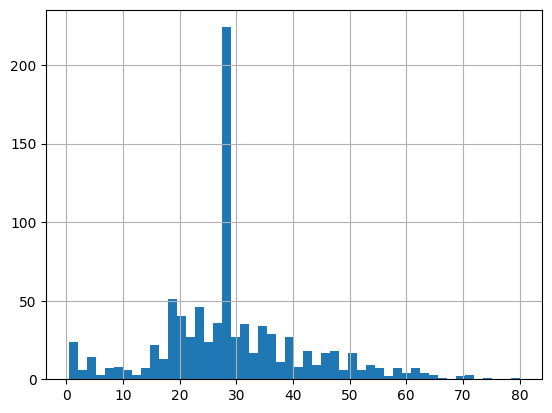

In [ ]:
df["Age"].hist(bins=50)

In [ ]:
#shows all nan values are in centre replaced by median

<Axes: >

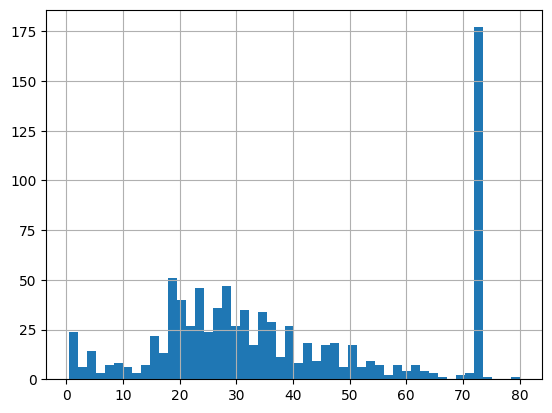

In [ ]:
df["Age_end_dist"].hist(bins=50)

In [ ]:
#in this the nan values are shown by long line in the end of the distribution
#and now the data is right skewed

<Axes: >

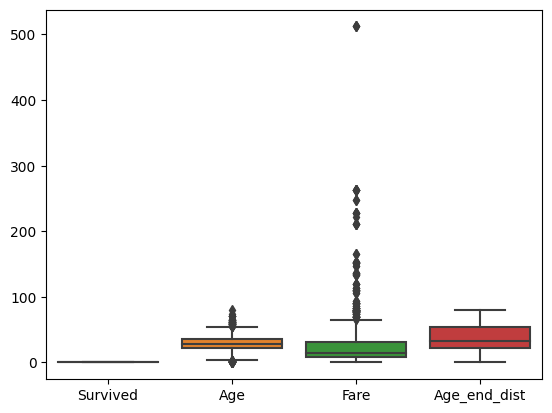

In [ ]:
sns.boxplot(data=df)

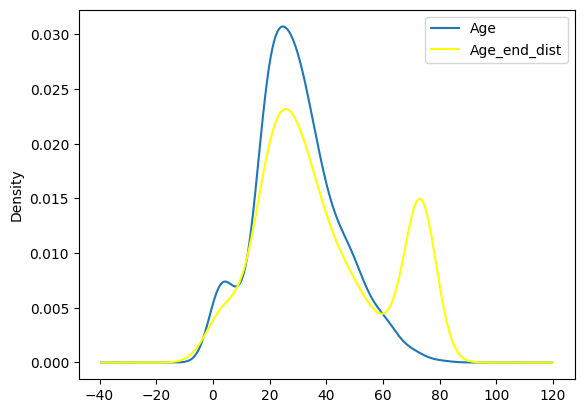

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
data["Age"].plot(kind="kde",ax=ax)
df.Age_end_dist.plot(kind="kde",ax=ax,color='yellow')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
data=pd.read_csv("/content/Titanic Data Set CSV File (main).csv",usecols=['Age','Fare','Survived'])

In [ ]:
 #DEALING WITH MISSING CATEGORICAL FEATURES

In [ ]:
data=pd.read_csv("/content/Advanced House price Data Set CSV File.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
#FREQUENT CATEGORY IMPUTATION

In [ ]:
 data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [ ]:
#Compute the Frequency with every feature

<Axes: xlabel='BsmtQual'>

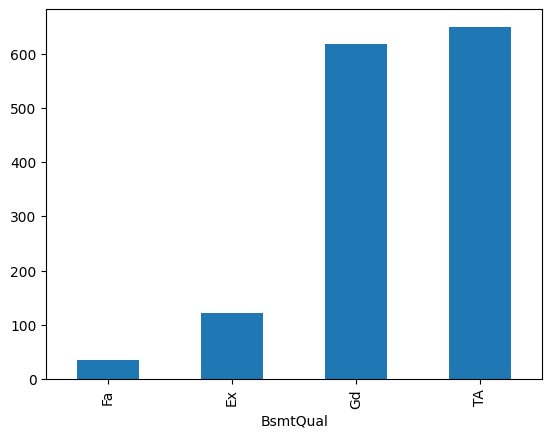

In [ ]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot.bar()

<Axes: >

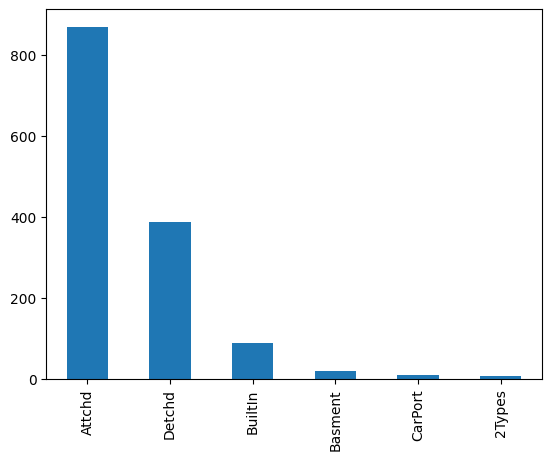

In [ ]:
 data['GarageType'].value_counts().plot.bar()

<Axes: >

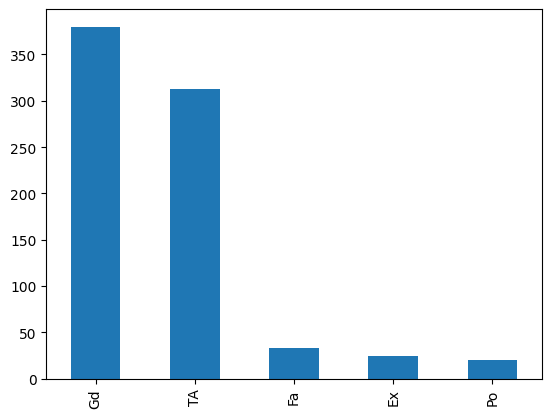

In [ ]:
data['FireplaceQu'].value_counts().plot.bar()

In [ ]:
data['FireplaceQu'].value_counts().index[0]

'Gd'

In [ ]:
def impute_nan(data,variable):
  most_freq_cat=data[variable].value_counts().index[0]
  data[variable].fillna(most_freq_cat,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(data,feature)

In [ ]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [ ]:
#ADDING A NEW VARIABLE TO CAPTURE NaN
data['BsmtQual_var']=np.where(data['BsmtQual'].isnull(),1,0)
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,Gd,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [ ]:
data['FireplaceQu_var']=np.where(data['FireplaceQu'].isnull(),1,0)
frequent=data['FireplaceQu'].mode()[0]
data['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,0,Gd,Attchd,208500,0,0
1,0,TA,Attchd,181500,0,0
2,0,TA,Attchd,223500,0,0
3,0,Gd,Detchd,140000,0,0
4,0,TA,Attchd,250000,0,0


In [ ]:
#WHEN WE HAVE MORE FREQUENT CATEGORIES WE REPLACE NaN WITH A NEW CATEGORY

In [ ]:
def impute_nan(data,variable):
  data[variable+"newvar"]=np.where(data[variable].isnull(),'Missing',data[variable])

In [ ]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
  impute_nan(data,feature)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,0,Gd,Attchd,208500,0,0,0,Gd,Attchd
1,0,TA,Attchd,181500,0,0,0,TA,Attchd
2,0,TA,Attchd,223500,0,0,0,TA,Attchd
3,0,Gd,Detchd,140000,0,0,0,Gd,Detchd
4,0,TA,Attchd,250000,0,0,0,TA,Attchd
